In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
pd.pandas.set_option('display.max_columns', None)
df.head()

,Area Type,Availability,location,Bedrooms,society,Total Sqft,Bathrooms,Balcony,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df = df.drop(columns=['location', 'society'])
df.head()

,Area Type,Availability,Bedrooms,Total Sqft,Bathrooms,Balcony,Price
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00


In [4]:
df['Area Type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df['Bedrooms'] = df['Bedrooms'].str.replace(r' BHK| Bedroom| RK', '', regex=True)
df['Total Sqft'] = df['Total Sqft'].str.replace(r'Sq. Meter|Perch|Sq. Yards|Acres|Cents|Guntha|Grounds', '', regex=True)

In [6]:
df['Area Type'] = pd.factorize(df['Area Type'])[0] + 1

In [7]:
from datetime import datetime

def func(value):
    try:
        datetime.strptime(value, '%d-%b')
        return 0
    except ValueError:
        return 1
    
df['Availability'] = df['Availability'].apply(func)

In [8]:
def func(value):
    if '-' in value:
        return np.nan
    else:
        return value
    
df['Total Sqft'] = df['Total Sqft'].apply(func)

In [9]:
df.head()

,Area Type,Availability,Bedrooms,Total Sqft,Bathrooms,Balcony,Price
0,1,0,2,1056,2.0,1.0,39.07
1,2,1,4,2600,5.0,3.0,120.00
2,3,1,3,1440,2.0,3.0,62.00
3,1,1,3,1521,3.0,1.0,95.00
4,1,1,2,1200,2.0,1.0,51.00


In [10]:
df.isnull().sum()

Area Type         0
Availability      0
Bedrooms         16
Total Sqft      201
Bathrooms        73
Balcony         609
Price             0
dtype: int64

In [11]:
df.dtypes

Area Type         int64
Availability      int64
Bedrooms         object
Total Sqft       object
Bathrooms       float64
Balcony         float64
Price           float64
dtype: object

In [12]:
df['Total Sqft'] = df['Total Sqft'].astype('float64')

In [13]:
df.dtypes

Area Type         int64
Availability      int64
Bedrooms         object
Total Sqft      float64
Bathrooms       float64
Balcony         float64
Price           float64
dtype: object

In [14]:
# To convert the Bedrooms column to numeric, to handle the missing values
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')

In [15]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df[df.columns[2:6]] = imputer.fit_transform(df[df.columns[2:6]])

# from sklearn.impute import SimpleImputer

# impute_mode = SimpleImputer(strategy='mean')
# df[df.columns[2:6]] = impute_mode.fit_transform(df[df.columns[2:6]])

In [16]:
df.head()

,Area Type,Availability,Bedrooms,Total Sqft,Bathrooms,Balcony,Price
0,1,0,2.0,1056.0,2.0,1.0,39.07
1,2,1,4.0,2600.0,5.0,3.0,120.00
2,3,1,3.0,1440.0,2.0,3.0,62.00
3,1,1,3.0,1521.0,3.0,1.0,95.00
4,1,1,2.0,1200.0,2.0,1.0,51.00


In [17]:
df.isnull().sum()

Area Type       0
Availability    0
Bedrooms        0
Total Sqft      0
Bathrooms       0
Balcony         0
Price           0
dtype: int64

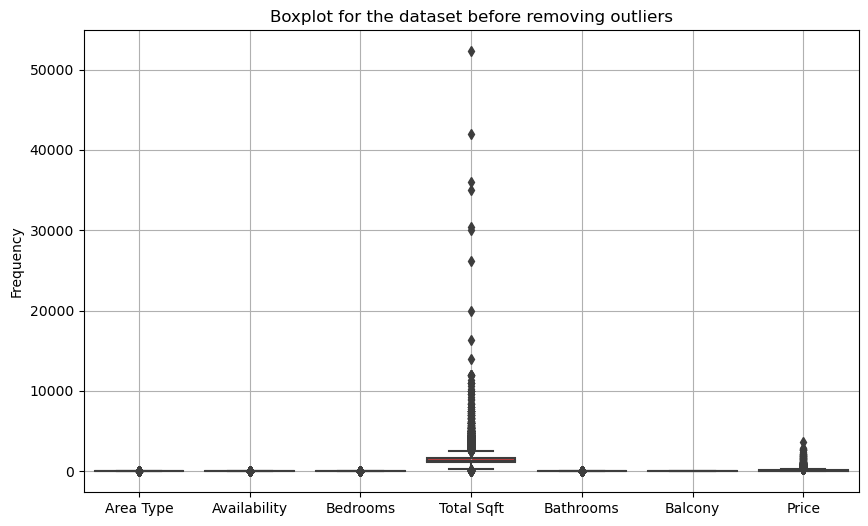

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot for the dataset before removing outliers")
plt.ylabel("Frequency")
plt.xticks(range(7), df)
plt.grid(True)
plt.show()

In [19]:
data = df[df.columns]
Q3 = data.quantile(0.75)
Q1 = data.quantile(0.25)
IQR = Q3 - Q1
UpperBound = Q3 + 1.5 * IQR
LowerBound = Q1 - 1.5 * IQR
outlier_data = (data < LowerBound) | (data > UpperBound)

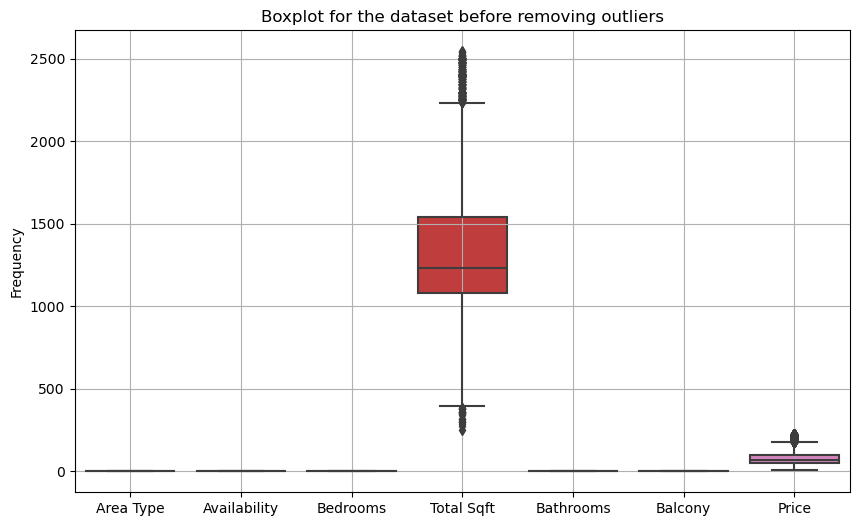

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[~outlier_data])
plt.title("Boxplot for the dataset before removing outliers")
plt.ylabel("Frequency")
plt.xticks(range(7), df)
plt.grid(True)
plt.show()

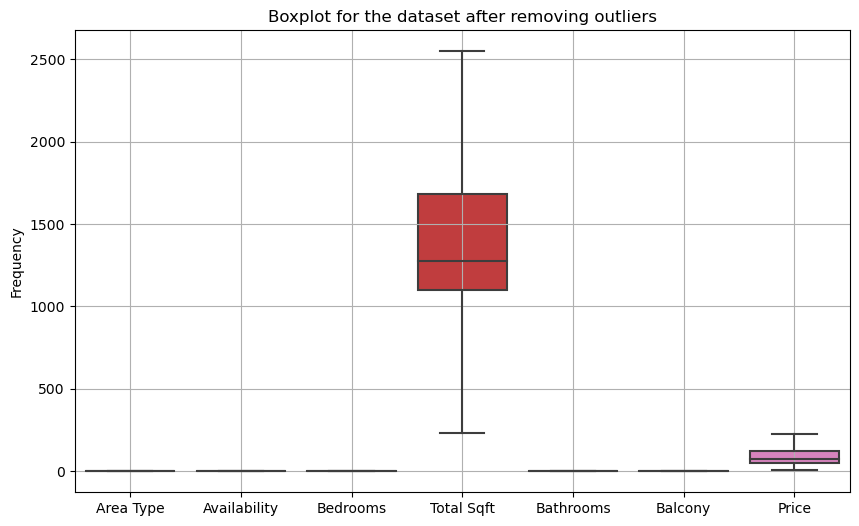

In [21]:
df = df.clip(lower=LowerBound, upper=UpperBound, axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot for the dataset after removing outliers")
plt.ylabel("Frequency")
plt.xticks(range(7), df)
plt.grid(True)
plt.show()

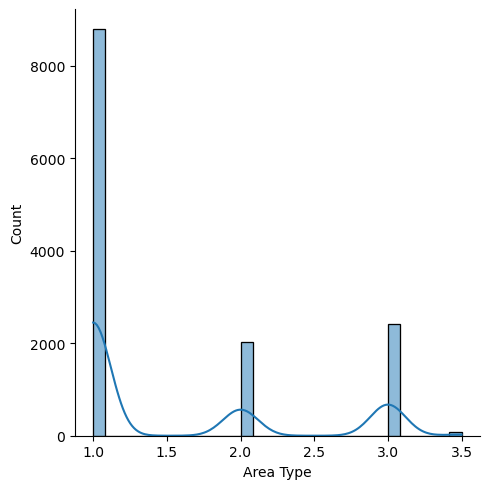

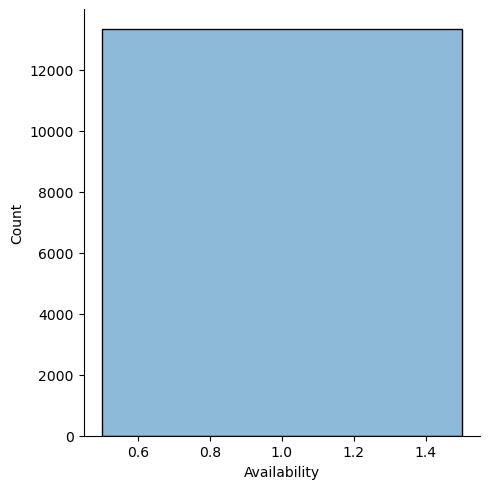

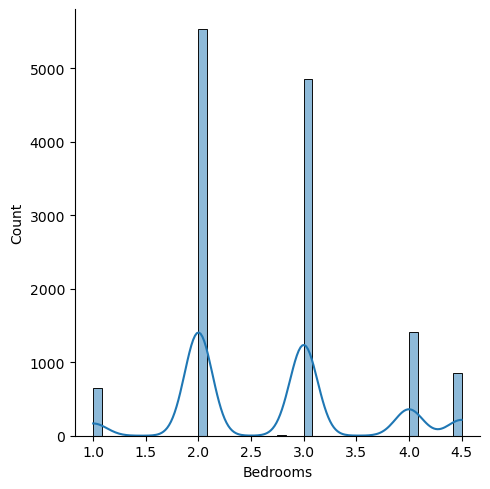

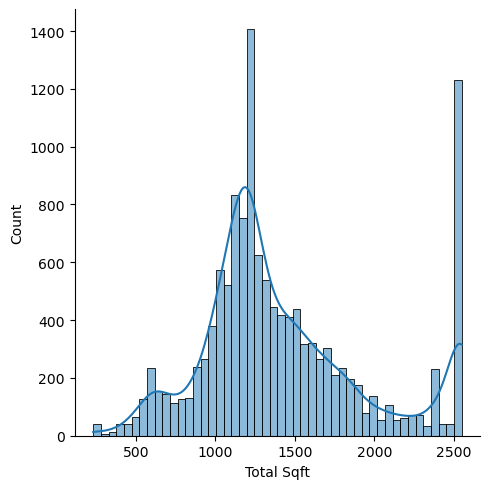

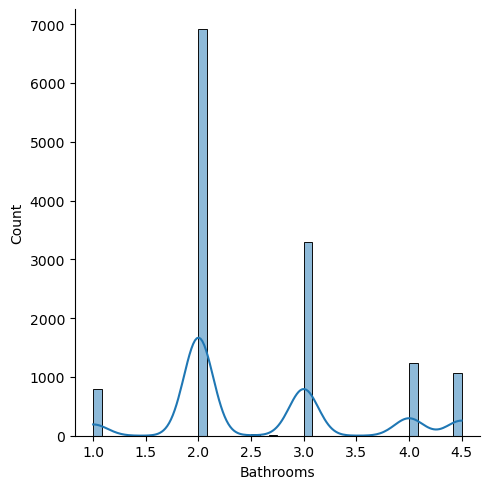

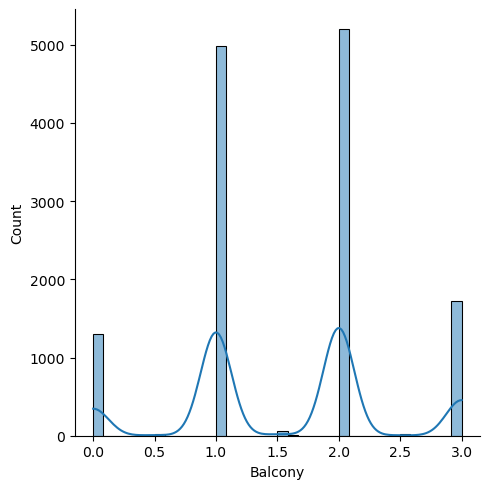

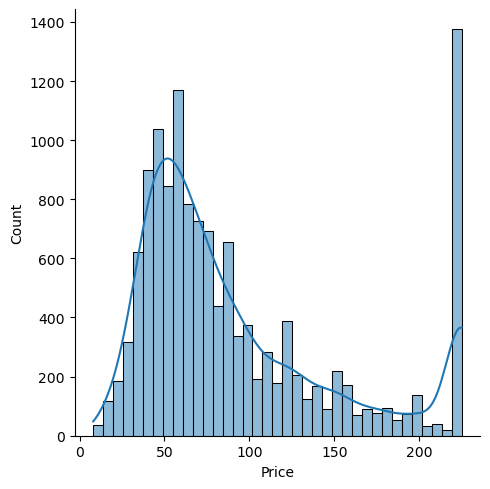

In [22]:
sns.displot(data=df['Area Type'], kde=True)
sns.displot(data=df['Availability'], kde=True)
sns.displot(data=df['Bedrooms'], kde=True)
sns.displot(data=df['Total Sqft'], kde=True)
sns.displot(data=df['Bathrooms'], kde=True)
sns.displot(data=df['Balcony'], kde=True)
sns.displot(data=df['Price'], kde=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.iloc[:, :6]
Y = df.iloc[:, 6]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred_train = lr.predict(X_train)
Y_pred_test = lr.predict(X_test)

r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)

print("Training Accuracy : ", r2_train)
print("Testing Accuracy : " , r2_test)

Training Accuracy :  0.651264706186055
Testing Accuracy :  0.652530645119159


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.iloc[:, :6]
Y = df.iloc[:, 6]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

Y_pred_train = rf.predict(X_train)
Y_pred_test = rf.predict(X_test)

mse_train = mean_squared_error(Y_train, Y_pred_train)
mse_test = mean_squared_error(Y_test, Y_pred_test)

r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)

print("Training Mean Squared Error: ", mse_train)
print("Testing Mean Squared Error: ", mse_test)
print("Training R-squared: ", r2_train)
print("Testing R-squared: ", r2_test)

Training Mean Squared Error:  422.04460672218147
Testing Mean Squared Error:  1032.4477235644147
Training R-squared:  0.8808740929337807
Testing R-squared:  0.7139454977867719


In [25]:
import pickle

with open('HousePrice.pkl', 'wb') as file:
    pickle.dump(rf, file)

with open('HousePrice.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

predictions = loaded_model.predict(X_test)
print("Testing Accuracy: ", loaded_model.score(X_test, Y_test))

Testing Accuracy:  0.7139454977867719


In [26]:
import pickle

# Load the model
model = pickle.load(open("D:\\EDA\\HousePrice_Predictor v1.1\\HousePrice.pkl", "rb"))

def get_input(prompt):
    return input(prompt)

def main():
    print("Enter the following details to predict house price:")

    area_type = int(get_input('Area Type (e.g., 1 for Super Built-up Area, 2 for Plot Area, etc.): '))
    availability = int(get_input('Availability (e.g., 1 for Ready To Move, 0 for Not Ready): '))
    bedrooms = float(get_input('Number of Bedrooms: '))
    bathrooms = float(get_input('Number of Bathrooms: '))
    balcony = float(get_input('Number of Balconies: '))
    total_sqft = float(get_input('Total Square Feet: '))

    prediction = model.predict([[area_type, availability, bedrooms, bathrooms, balcony, total_sqft]])
    output = round(prediction[0], 2)

    print(f"Your house price is Rs. {output} Lakhs")

if __name__ == "__main__":
    main()

Enter the following details to predict house price:
Your house price is Rs. 87.59 Lakhs


c:\Users\SOHAM MAITY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
